# Lab 10
# Xiuqi Chen

## Problem 1

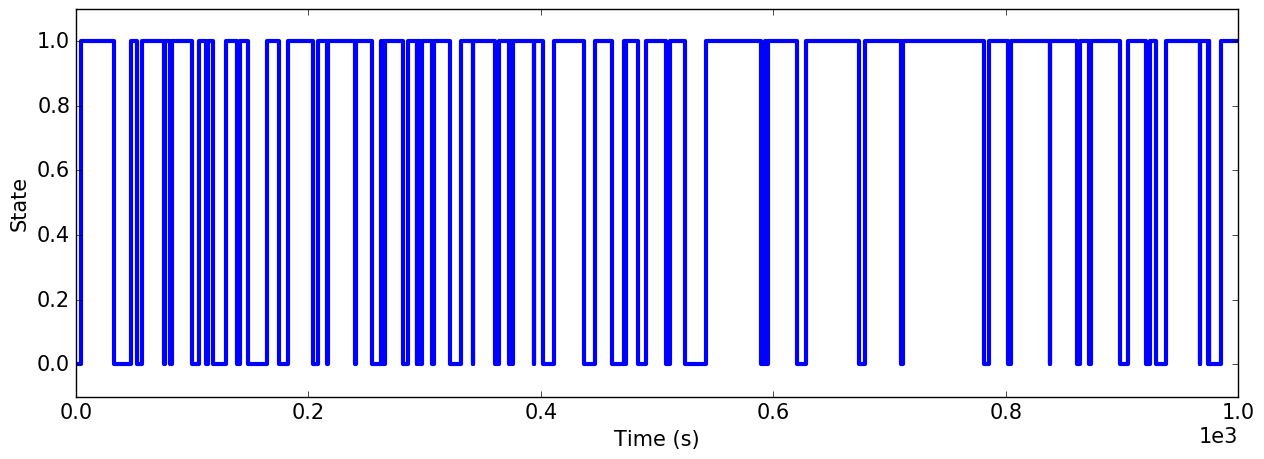

In [204]:
# Standard iPython notebook preamble.
%matplotlib inline
from __future__ import division
import matplotlib as plt
import numpy as np
from pylab import *
matplotlib.rcParams.update({"axes.formatter.limits": (-3,3)})
plotStyles={"markersize":10,"markeredgewidth":2.0,"linewidth":3.0}
stepStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}

# Set k1 and k2 for the notebook.
k1=0.15
k2=0.07

import numpy.random as rnd

def performFoldingSimulation(k1,k2,tf):
    ts=[0.0]   # a list of the times when a state change has occurred; initial time is 0.0
    states=[0] # state 0 is unfolded, state 1 is folded; initial state is unfolded
    while (ts[-1]<tf):

        # If we are in the unfolded state, figure out when the molecule transitions to the folded state.
        if states[-1] == 0:
            ts.append(ts[-1]+rnd.exponential(1/k1))
            states.append(1)

        # If we are in the folded state, figure out when the molecule transitions to the unfolded state.
        else:
            ts.append(ts[-1]+rnd.exponential(1/k2))
            states.append(0)
    return (ts,states)

# Plot an example trace.
tf=1000.0
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,5)})
ts,states = performFoldingSimulation(k1,k2,tf)
step(ts,states, **stepStyles)
xlabel('Time (s)'); xlim([0,tf]); ylim([-0.1,1.1]); ylabel('State')
pass


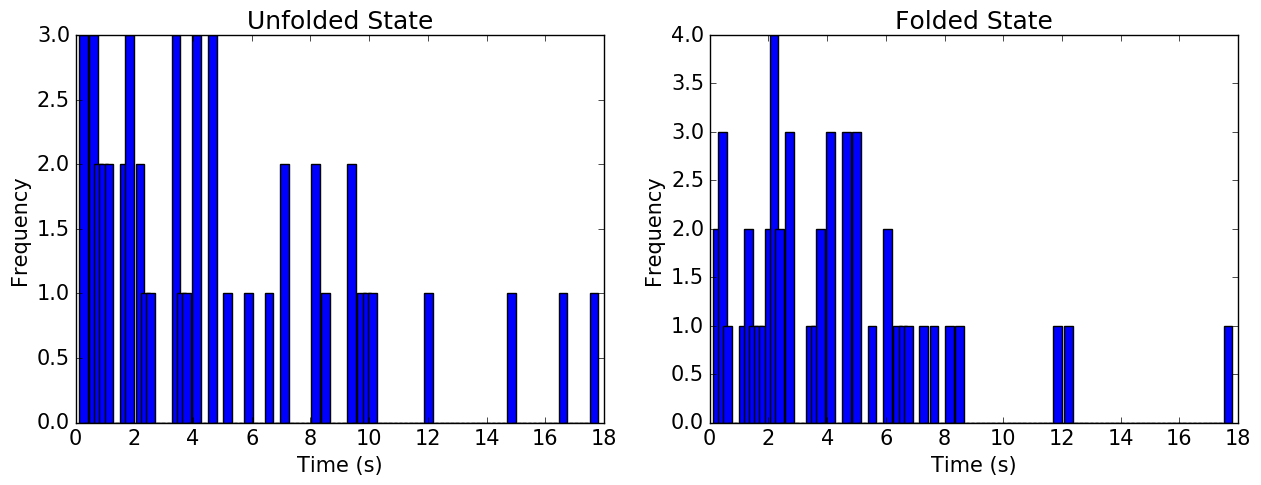

In [205]:
duration=[]

for i in range(0,len(states)-1):
    duration.append(ts[i+1]-ts[i])

folded=[]
unfolded=[]

for i in range(0,len(duration)):
    if states[i]==0:
        unfolded.append(duration[i])
    if states[i]==1:
        folded.append(duration[i])

u_hist, u_edges = np.histogram(unfolded,bins=100)
f_hist, f_edges = np.histogram(folded,bins=100)

u_center=[]
f_center=[]

for i in range(0,len(u_edges)-1):
    u_center.append((u_edges[i]+u_edges[i+1])/2)
    
for i in range(0,len(f_edges)-1):
    f_center.append((f_edges[i]+f_edges[i+1])/2)

plt.subplot(121)
plt.bar(u_center,u_hist,width=0.3)
title('Unfolded State')
xlabel('Time (s)'); ylabel('Frequency')

plt.subplot(122)
plt.bar(u_center,f_hist,width=0.3)
title('Folded State')
xlabel('Time (s)'); ylabel('Frequency')

## Problem 2

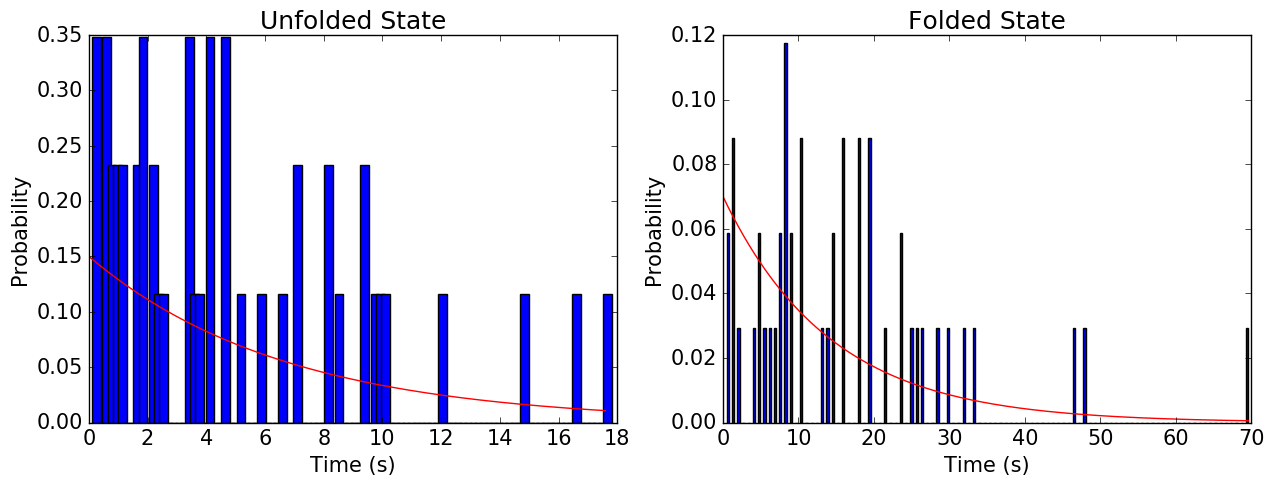

In [206]:
u_bar_width = u_edges[1]-u_edges[0] 
f_bar_width = f_edges[1]-f_edges[0]

u_sum=len(unfolded)
f_sum=len(folded)

u_prob = u_hist/(u_sum*u_bar_width)
f_prob = f_hist/(f_sum*f_bar_width)

plt.subplot(121)
plt.bar(u_center,u_prob,width=0.3)
title('Unfolded State')
xlabel('Time (s)'); ylabel('Probability')
t = linspace(0,max(unfolded),1000)
unProb=k1*exp(-k1*t)
plt.plot(t,unProb,'r')

plt.subplot(122)
plt.bar(f_center,f_prob,width=0.3)
title('Folded State')
xlabel('Time (s)'); ylabel('Probability')
t = linspace(0,max(folded),1000)
fProb=k2*exp(-k2*t)
plt.plot(t,fProb,'r')

## Problem 3

Fitted k1: [ 0.19999999] Relative Error (%): [ 33.33332697]
Fitted k2: [ 0.05303486] Relative Error (%): [ 24.23592023]


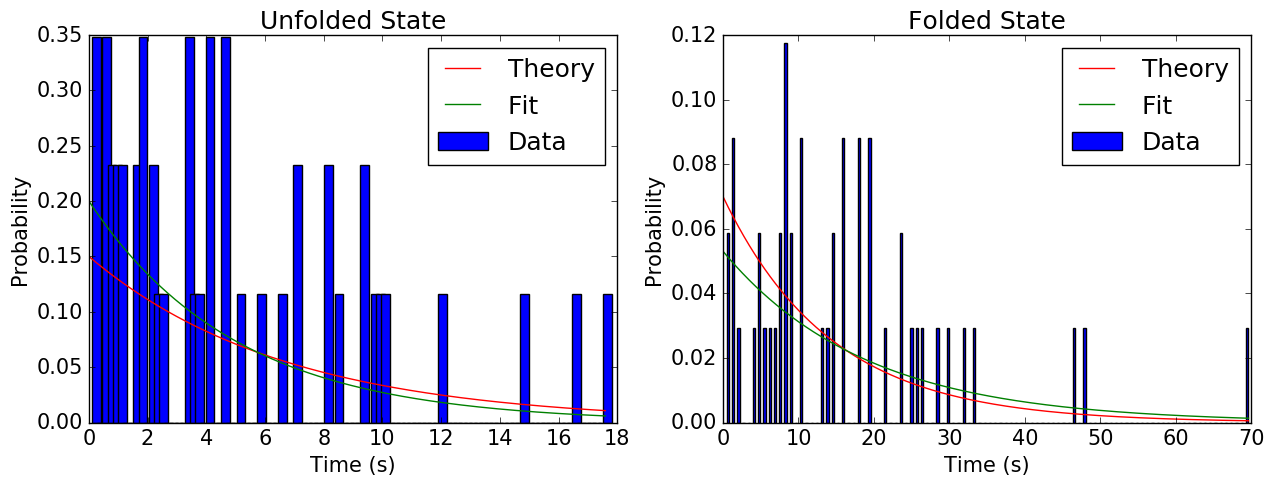

In [207]:
from scipy.optimize import curve_fit

k1fit, pcov = curve_fit(lambda t,k1fit:k1fit*np.exp(-k1fit*t),  u_center,  u_prob,bounds=(0,0.2))
k2fit, pcov = curve_fit(lambda t,k2fit:k2fit*np.exp(-k2fit*t),  f_center,  f_prob,bounds=(0,0.1))

plt.subplot(121)
plt.bar(u_center,u_prob,width=0.3)
title('Unfolded State')
xlabel('Time (s)'); ylabel('Probability')
t = linspace(0,max(unfolded),1000)
unProb=k1*exp(-k1*t)
plt.plot(t,unProb,'r')

unProbfit=k1fit*exp(-k1fit*t)
plt.plot(t,unProbfit,'g')

plt.legend(['Theory', 'Fit', 'Data'])
print "Fitted k1:",k1fit, "Relative Error (%):",abs((k1fit-k1)/k1)*100


plt.subplot(122)
plt.bar(f_center,f_prob,width=0.3)
title('Folded State')
xlabel('Time (s)'); ylabel('Probability')
t = linspace(0,max(folded),1000)
fProb=k2*exp(-k2*t)
plt.plot(t,fProb,'r')

fProbfit=k2fit*exp(-k2fit*t)
plt.plot(t,fProbfit,'g')

plt.legend(['Theory', 'Fit', 'Data'])
print "Fitted k2:",k2fit, "Relative Error (%):", abs((k2fit-k2)/k2)*100


In [208]:
tf=10000.0
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,5)})
ts,states = performFoldingSimulation(k1,k2,tf)

Fitted k1: [ 0.13484011] Relative Error (%): [ 10.10659509]
Fitted k2: [ 0.06821079] Relative Error (%): [ 2.55601586]


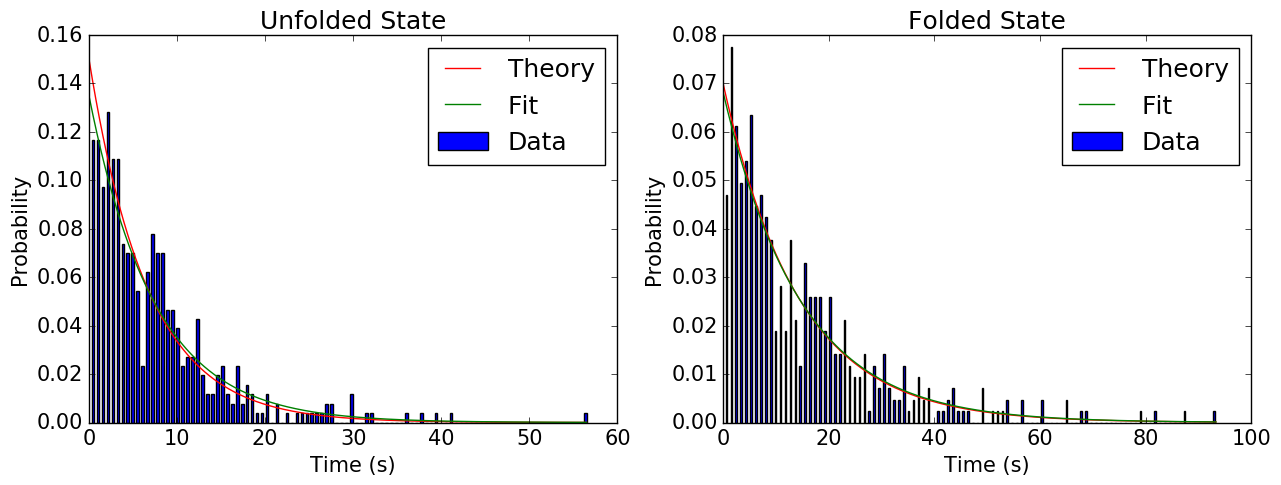

In [209]:
duration=[]

for i in range(0,len(states)-1):
    duration.append(ts[i+1]-ts[i])

folded=[]
unfolded=[]

for i in range(0,len(duration)):
    if states[i]==0:
        unfolded.append(duration[i])
    if states[i]==1:
        folded.append(duration[i])

u_hist, u_edges = np.histogram(unfolded,bins=100)
f_hist, f_edges = np.histogram(folded,bins=100)

u_center=[]
f_center=[]

for i in range(0,len(u_edges)-1):
    u_center.append((u_edges[i]+u_edges[i+1])/2)
    
for i in range(0,len(f_edges)-1):
    f_center.append((f_edges[i]+f_edges[i+1])/2)

    
u_bar_width = u_edges[1]-u_edges[0] 
f_bar_width = f_edges[1]-f_edges[0]

u_sum=len(unfolded)
f_sum=len(folded)

u_prob = u_hist/(u_sum*u_bar_width)
f_prob = f_hist/(f_sum*f_bar_width)
    
k1fit, pcov = curve_fit(lambda t,k1fit:k1fit*np.exp(-k1fit*t),  u_center,  u_prob,bounds=(0,0.2))
k2fit, pcov = curve_fit(lambda t,k2fit:k2fit*np.exp(-k2fit*t),  f_center,  f_prob,bounds=(0,0.1))

plt.subplot(121)
plt.bar(u_center,u_prob,width=0.3)
title('Unfolded State')
xlabel('Time (s)'); ylabel('Probability')
t = linspace(0,max(unfolded),1000)
unProb=k1*exp(-k1*t)
plt.plot(t,unProb,'r')

unProbfit=k1fit*exp(-k1fit*t)
plt.plot(t,unProbfit,'g')

plt.legend(['Theory', 'Fit', 'Data'])
print "Fitted k1:",k1fit, "Relative Error (%):",abs((k1fit-k1)/k1)*100

plt.subplot(122)
plt.bar(f_center,f_prob,width=0.3)
title('Folded State')
xlabel('Time (s)'); ylabel('Probability')
t = linspace(0,max(folded),1000)
fProb=k2*exp(-k2*t)
plt.plot(t,fProb,'r')

fProbfit=k2fit*exp(-k2fit*t)
plt.plot(t,fProbfit,'g')

plt.legend(['Theory', 'Fit', 'Data'])
print "Fitted k2:",k2fit, "Relative Error (%):", abs((k2fit-k2)/k2)*100
